# Practice session 3: section 04


Og is the leader of the surprisingly mathematically advanced, though technologically run-of-the-mill, Calm Waters caveman tribe.
He must decide on the number of stone clubs and stone axes to be produced for the upcoming battle against the neighboring Peaceful Sunset tribe. Experience has taught him that each club is good for, on the average, 0.45 kills and 0.65 maims, while each axe produces 0.70 kills and 0.35 maims. Production of a club requires 5.1 lb of stone and 2.1 man-hours of labor while an axe requires 3.2 lb of
stone and 4.3 man-hours of labor. Og’s tribe has 240 lb of stone available for weapons production, and a total of 200 man-hours of labor available before the expected time of this battle (that Og is sure will end war for all time). Og values a kill as worth two maims in quantifying the damage inflicted on the enemy, and he wishes to produce that mix of weapons that will maximize damage.

* Formulate this as a linear programming problem. Make sure to define your decision variables.
* Represent this problem graphically, 
    * Identify all the feasible corner points
    * Bonus: also identify infeasible corner points.
* Solve the problem graphically.
* Solve the problem using the computer

# Solution

## Formulate this as a linear programming problem. Make sure to define your decision variables.

$$x_1 = clubs$$

$$x_2 = axes$$

$$z = 0.45 \cdot 2 \cdot x_1 +   0.65 \cdot 1 \cdot x_1 + 0.70 \cdot 2 \cdot x_2 +   0.35 \cdot 1 \cdot x_2 $$

$$z = 1.55 \cdot x_1 + 1.75 \cdot x_2$$
Stone:

$$ 5.1 \cdot x_1 + 3.2 \cdot x_2 \leq 240$$ 

Labor: 

$$ 2.1 \cdot x_1 + 4.3 \cdot x_2 \leq 200$$ 

$$ x_1, x_2 \geq 0$$



## Represent this problem graphically, making sure to identify all the feasible corner points and the infeasible corner points.

The feasible corner points are those interesections that lie within the boundaries. In the plot below, there are 4 feasible corner points, the interesctions depicted. We can observe that there are two more infeasible border points: the intersection between constraints 1 and 3, and the intersection between constraints 2 and 4.

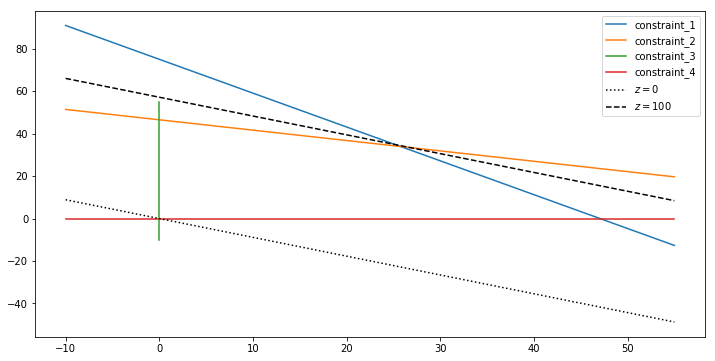

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1s = np.linspace(-10, 55)
x2s = np.linspace(-10, 55)

constraint_1 = (240 - 5.1 * x1s) / 3.2
constraint_2 = (200 - 2.1 * x1s) / 4.3
constraint_3 = 0
constraint_4 = 0
objective_0 = (0 - 1.55 * x1s) / 1.75
objective_100 = (100 - 1.55 * x1s) / 1.75

plt.plot(x1s, constraint_1, label="constraint_1")
plt.plot(x1s, constraint_2, label="constraint_2")
plt.plot([constraint_3] * len(x2s), x2s, label="constraint_3")
plt.plot(x1s, [constraint_4] * len(x1s), label="constraint_4")

plt.plot(x1s, objective_0, label="$z = 0$", color="black", linestyle=":")
plt.plot(x1s, objective_100, label="$z = 100$", color="black", linestyle="--")


plt.gcf().set_size_inches(12,6)
plt.legend();

## Solve the problem graphically.

The solution seems to lie around 26 clubs and 34 axes

## Solve the problem using the computer

Since we have already determined that the solution is the intersection between the equations for stone and labor, we can transform these into equalities and solve the resulting linear system by any method:

Stone:

$$ 5.1 \cdot x_1 + 3.2 \cdot x_2 = 240$$ 

Labor: 

$$ 2.1 \cdot x_1 + 4.3 \cdot x_2 = 200$$ 

In [2]:
AB = np.array([5.1, 3.2, 240, 2.1, 4.3, 200]).reshape(2,3)
AB[1] = AB[1] - AB[0] * AB[1,0] / AB[0,0]
AB[0] = AB[0] - AB[1] * AB[0,1] / AB[1,1]
AB[0] = AB[0] / AB[0,0]
AB[1] = AB[1] / AB[1,1]
AB

array([[ 1.        ,  0.        , 25.77251808],
       [ 0.        ,  1.        , 33.92504931]])

Since the tribe can only produce an integer amount of weapons, we will have to decide between 26 clubs and 33 axes, or 25 clubs and 34 axes:

In [3]:
1.55 * 26 + 1.75 * 33, 1.55 * 25 + 1.75 * 34

(98.05000000000001, 98.25)

25 clubs and 34 axes is the optimal solution, with an expected result of 98.25 maim-equivalents.